In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import kde
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
iris = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Calculate the mean, median, and mode of the sepal lengths in the Iris dataset.

In [4]:
print("Mean:",np.mean(iris['sepal_length']))
print("Median:",np.median(iris['sepal_length']))
print(stats.mode(iris['sepal_length']))


Mean: 5.843333333333334
Median: 5.8
ModeResult(mode=5.0, count=10)


### Calculate the variance and standard deviation of the petal widths in the Iris dataset.

In [5]:
print("Variance: ", np.var(iris["petal_width"]))

Variance:  0.5785315555555555


In [6]:
print("std: ",np.std(iris["petal_width"]))

std:  0.7606126185881716


### Create a summary table that includes the mean, median, variance, and standard deviation for all numerical features in the dataset

In [7]:
numerical_features = iris.select_dtypes(include=[np.number])  # Select numerical columns
summary_stats = numerical_features.describe(percentiles=[0.25, 0.5, 0.75])  # Calculate statistics

print(summary_stats.round(2))

       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.05          3.76         1.20
std            0.83         0.43          1.76         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50


###  Define a random variable for the sepal length and calculate the probability distribution of sepal lengths.

In [8]:
mu = 5.84  
sigma = 0.83

X = norm(loc=mu, scale=sigma)
print(f"Probability of sepal length:", X.cdf(6) - X.cdf(5))

Probability of sepal length: 0.4206733692833103


### Plot the probability distribution of sepal lengths using a histogram.

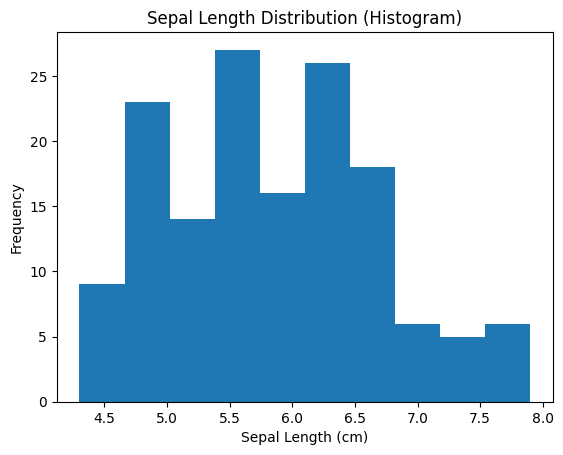

In [9]:
sepal_length = iris["sepal_length"]

plt.hist(sepal_length)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.title("Sepal Length Distribution (Histogram)")
plt.show()

### Calculate the cumulative distribution function (CDF) for the petal lengths and plot it.

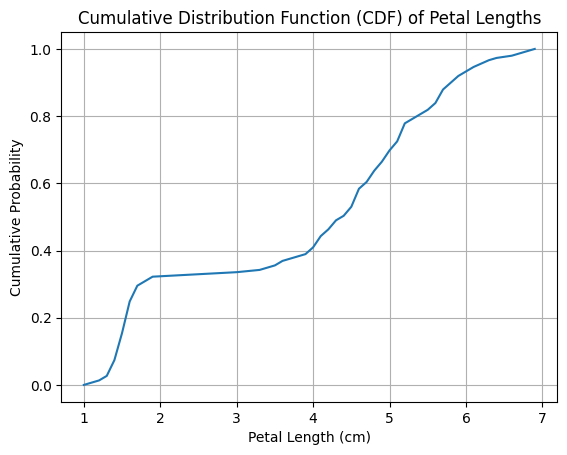

In [10]:
petal_length = iris["petal_length"]
sorted_petal_length = sorted(petal_length)
cdf = [sorted_petal_length.index(p) / (len(sorted_petal_length) - 1) for p in sorted_petal_length]

plt.plot(sorted_petal_length, cdf)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF) of Petal Lengths")
plt.grid(True)
plt.show()

### Calculate and plot the probability density function (PDF) for sepal width.

/tmp/ipykernel_18/2321066010.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde_dist = kde.gaussian_kde(sepal_width)


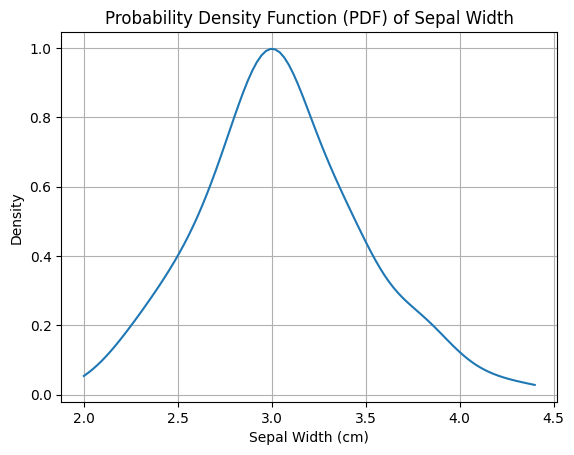

In [11]:
sepal_width = iris["sepal_width"]
kde_dist = kde.gaussian_kde(sepal_width)
x = np.linspace(min(sepal_width), max(sepal_width), 100)  

density = kde_dist(x)

plt.plot(x, density)
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) of Sepal Width")
plt.grid(True)
plt.show()

### Determine the probability of a randomly selected iris flower having a petal length greater than a given value.


In [12]:
petal_length = iris["petal_length"]
threshold_value =  4.00

greater_than_threshold = petal_length[petal_length > threshold_value]
probability = len(greater_than_threshold) / len(petal_length)
print(f"Probability of petal length > {threshold_value}cm: {probability:.4f}")

Probability of petal length > 4.0cm: 0.5600


### Perform a hypothesis test to determine if there is a significant difference in the mean petal length between two species of iris flowers.


In [13]:
species1 = "setosa"  
species2 = "versicolor"  
petal_length_species1 = iris[iris["species"] == species1]["petal_length"]
petal_length_species2 = iris[iris["species"] == species2]["petal_length"]

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(petal_length_species1, petal_length_species2)

alpha = 0.05

if p_value < alpha:
    print("Reject H0: There is a significant difference in mean petal length between", species1, "and", species2)
else:
    print("Fail to reject H0: Evidence is inconclusive for a significant difference.")

Fail to reject H0: Evidence is inconclusive for a significant difference.


### Calculate and interpret the covariance and correlation between sepal length and sepal width.

In [14]:
sepal_length = iris["sepal_length"]
sepal_width = iris["sepal_width"]

# Covariance
covariance = np.cov(sepal_length, sepal_width)[0, 1]  # Access co-variance value

# Correlation coefficient
correlation = np.corrcoef(sepal_length, sepal_width)[0, 1]  # Access correlation value

print("Covariance:", covariance)
print("Correlation coefficient:", correlation)

if covariance > 0:
  print("Interpretation: Positive covariance suggests sepal length and sepal width tend to increase together.")
elif covariance < 0:
  print("Interpretation: Negative covariance suggests sepal length and sepal width tend to move in opposite directions.")
else:
  print("Interpretation: Covariance is zero, indicating no linear relationship between sepal length and sepal width.")

Covariance: -0.03926845637583893
Correlation coefficient: -0.10936924995064937
Interpretation: Negative covariance suggests sepal length and sepal width tend to move in opposite directions.
